<a href="https://colab.research.google.com/github/shreyasat27/MSc-QT-/blob/main/AQM_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

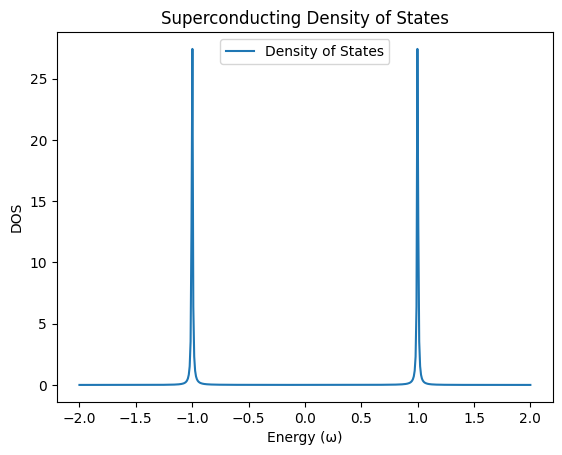

ω = -2.00, DOS = 0.00035
ω = -1.50, DOS = 0.00204
ω = -1.00, DOS = 31.83099
ω = -0.50, DOS = 0.00566
ω = 0.00, DOS = 0.00318
ω = 0.50, DOS = 0.00566
ω = 1.00, DOS = 31.83099
ω = 1.50, DOS = 0.00204
ω = 2.00, DOS = 0.00035


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Exercise 4: Superconducting Density of States using Green's Function
# Define the Green's function in Nambu space
def green_function(omega, Delta, gamma=0.01):
    return 1 / (omega**2 - Delta**2 + 1j * gamma)

omega_vals = np.linspace(-2, 2, 500)
Delta = 1.0
DOS = -np.imag(green_function(omega_vals, Delta)) / np.pi

plt.figure()
plt.plot(omega_vals, DOS, label='Density of States')
plt.xlabel('Energy (ω)')
plt.ylabel('DOS')
plt.title('Superconducting Density of States')
plt.legend()
plt.show()


# Define parameters
Delta = 1.0  # Superconducting gap
gamma = 0.01  # Broadening factor
omega_vals = np.array([-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0])

# Compute the Green's function and DOS
G_omega = 1 / (omega_vals**2 - Delta**2 + 1j * gamma)
DOS_values = -np.imag(G_omega) / np.pi

# Print results
for omega, dos in zip(omega_vals, DOS_values):
    print(f"ω = {omega:.2f}, DOS = {dos:.5f}")



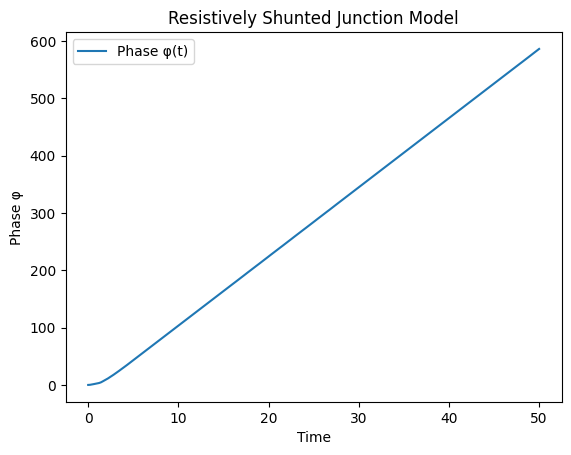

In [2]:
# Exercise 5: Josephson Junction - RSJ Model
def rsj_model(t, y, I_ext, Ic, R, C):
    phi, dphi_dt = y
    d2phi_dt2 = (I_ext - Ic * np.sin(phi) - dphi_dt / R) / C
    return [dphi_dt, d2phi_dt2]

Ic, R, C = 1.0, 10.0, 0.1
I_ext = 1.2
sol = solve_ivp(rsj_model, [0, 50], [0, 0], args=(I_ext, Ic, R, C), dense_output=True)

plt.figure()
t_vals = np.linspace(0, 50, 500)
phi_vals = sol.sol(t_vals)[0]
plt.plot(t_vals, phi_vals, label='Phase φ(t)')
plt.xlabel('Time')
plt.ylabel('Phase φ')
plt.title('Resistively Shunted Junction Model')
plt.legend()
plt.show()



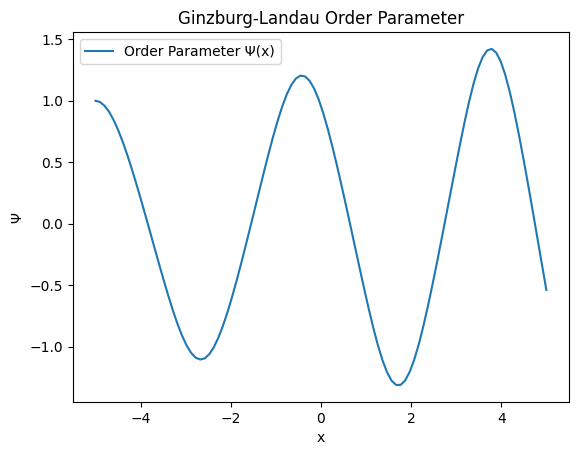

In [3]:
# Exercise 6: Anderson-Higgs Mechanism - Ginzburg-Landau Model
def gl_equation(x, psi, alpha, beta, kappa):
    dpsi_dx = psi[1]
    d2psi_dx2 = alpha * psi[0] - beta * psi[0]**3 + kappa * psi[1]
    return [dpsi_dx, d2psi_dx2]

x_vals = np.linspace(-5, 5, 100)
sol_gl = solve_ivp(gl_equation, [-5, 5], [1, 0], args=(-1, 1, 0.1), t_eval=x_vals)

plt.figure()
plt.plot(sol_gl.t, sol_gl.y[0], label='Order Parameter Ψ(x)')
plt.xlabel('x')
plt.ylabel('Ψ')
plt.title('Ginzburg-Landau Order Parameter')
plt.legend()
plt.show()